## Clasificador k-NN (k-Nearest Neighbors)

El **k-NN es un algoritmo de aprendizaje supervisado**, es decir, que a partir de una muestra inicial de datos su objetivo será el de clasificar correctamente todas las instancias nuevas.


El algoritmo **clasifica cada dato nuevo en el grupo que corresponda**, según tenga **k-vecinos** más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. **Este grupo será, por tanto, el de mayor frecuencia con menores distancias.**

- Generalmente la función de distancia usada es la euclidiana.


_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html_

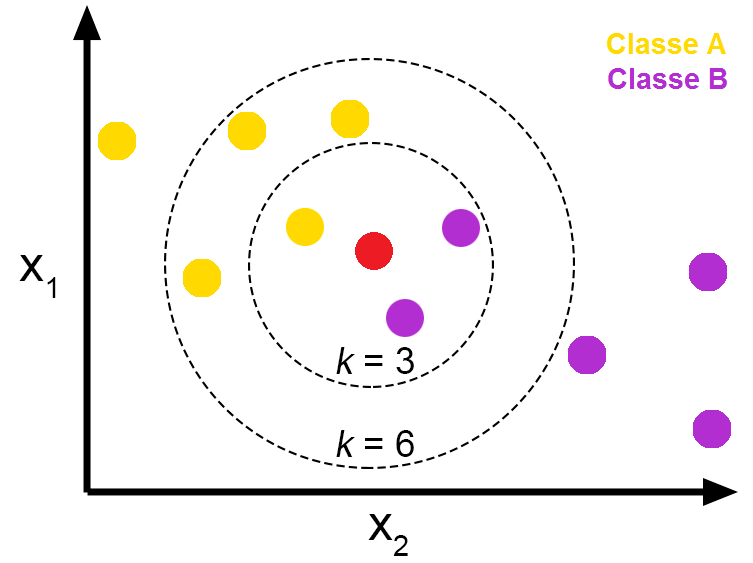

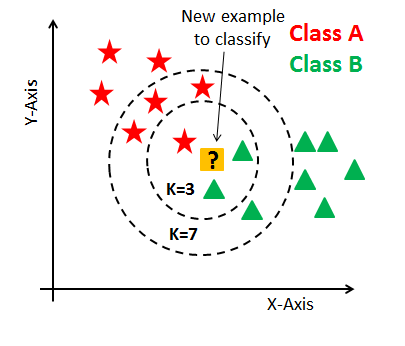

### **LIBRERÍAS NECESARIAS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Separación Train y Test
from sklearn.model_selection import train_test_split

# Modelo
from sklearn.neighbors import KNeighborsClassifier

# Métricas
from sklearn.metrics import accuracy_score

In [9]:
df = pd.read_csv("../Data/iris.csv")

### **SEPARACIÓN TRAIN Y TEST**

In [15]:
X = df.drop("Clase", axis = 1)

y = df["Clase"]

X.shape, y.shape

((150, 4), (150,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify= y)

# El parámetro stratify nos ayuda a que la separación de datos en train y test sigan la misma distribución a partir
# de la columna indicada.
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (120, 4), y_train: (120,)
X_test: (30, 4),  y_test: (30,)


### **PREPROCESAMIENTO DE DATOS**

In [21]:
# labelEncoder sobre la columna "Clase" para transformarla a numerica
clase_LabelEncoder = LabelEncoder()
clase_train = clase_LabelEncoder.fit_transform(y_train) # En este ejemplo estoy usando fit_transform()
y_train = clase_train
clase_test = clase_LabelEncoder.transform(y_test)
y_test = clase_test

### **NORMALIZACIÓN DE DATOS**

In [26]:
scaler = MinMaxScaler()

x_train_scaler = scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# No hace falta escalar la y porque son clases

### **MODELO**

In [27]:
# 3-Nearest Neighbors con datos normalizados
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# con datos sin normalizar
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train, y_train)


### **PREDICCIONES**

In [30]:
# Datos normalizados
yhat = model.predict(X_test_scaler)

In [31]:
# Datos sin nirmalizar
yhat2 = model2.predict(X_test)

### **MÉTRICAS**

In [33]:
print(f"Accuracy: {accuracy_score(y_test, yhat)}")
print(f"Accuracy: {accuracy_score(y_test, yhat2)}") # Sin normalizar mejor resultado

Accuracy: 0.9666666666666667
Accuracy: 1.0


### **MÉTODOS DEL MODELO**

In [48]:
# Con los datos de test normalizados
nombres_columnas = df["Clase"].unique().tolist()
# .predict_proba() retorna la probabilidad de una instancia de perterner a cada clase.

data = model.predict_proba(X_test_scaler)
# Como tenemos 3 clases diferentes entonces muestra la probabilidad de cada elemento de 
# Pertenerce a la clase 1, clase 2 o clase 3.
# El algormito elige a la clase a la que debe pertenecer donde el valor sea mayor.
df_predict_proba = pd.DataFrame(data, columns=nombres_columnas)
df_predict_proba.head(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.000000,0.000000
1,0.0,0.333333,0.666667
2,0.0,1.000000,0.000000
3,0.0,1.000000,0.000000
4,1.0,0.000000,0.000000


In [49]:
# Con los datos de test sin normalizar
nombres_columnas = df["Clase"].unique().tolist()
# .predict_proba() retorna la probabilidad de una instancia de perterner a cada clase.

data = model2.predict_proba(X_test)
# Como tenemos 3 clases diferentes entonces muestra la probabilidad de cada elemento de 
# Pertenerce a la clase 1, clase 2 o clase 3.
# El algormito elige a la clase a la que debe pertenecer donde el valor sea mayor.
df_predict_proba = pd.DataFrame(data, columns=nombres_columnas)
df_predict_proba.head(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.000000,0.000000
1,0.0,0.333333,0.666667
2,0.0,1.000000,0.000000
3,0.0,1.000000,0.000000
4,1.0,0.000000,0.000000


In [55]:
# .kneighbors retorna una tupla de arrays
model.kneighbors(X_test.iloc[0].values.reshape(1, -1)) 

# El primer elemento son las k-menores distancias (retorna 3 porque nuestro modelo esta entrenado con 3 vecinos)
# El segundo elemento son los indices de los k-elementos mas cercanos del conjunto X_train.

(array([[4.13784065, 4.19176191, 4.38135355]]),
 array([[22,  9, 86]], dtype=int64))

In [59]:
X_train.iloc[[22, 9, 86]]

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo
131,7.9,3.8,6.4,2.0
117,7.7,3.8,6.7,2.2
109,7.2,3.6,6.1,2.5


### **PREDECIR UNA NUEVA INSTANCIA**

Si quisieramos predecir una nueva instancia utilizando el modelo que acabamos de definir, debemos hacer las mismas transformaciones que hemos hecho al conjunto de Train y Test, para que de esta forma el modelo entienda los valores.

In [74]:
nueva_instancia = np.array([5.0, 2.5, 3.9, 2.3])
nueva_instancia

array([5. , 2.5, 3.9, 2.3])

In [75]:
nueva_instancia_normalizada = scaler.transform([nueva_instancia])
nueva_instancia_normalizada

C:\Users\Ane Zubieta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.19444444, 0.20833333, 0.48275862, 0.91666667]])

In [76]:
print(model.predict(nueva_instancia_normalizada))

[2]


In [78]:
print(model2.predict(nueva_instancia.reshape(1, -1)))

[1]


C:\Users\Ane Zubieta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [79]:
model.predict_proba(nueva_instancia_normalizada)

array([[0., 0., 1.]])

In [80]:
model2.predict_proba(nueva_instancia.reshape(1, -1))

C:\Users\Ane Zubieta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.66666667, 0.33333333]])

### **k-NN PARA VARIAS K's**

Podemos hacer un bucle que entrene el algoritmo **`n-veces`**, cambiando en cada una la **`k`** para saber con cual tiene un mejor desempeño.

In [93]:
def bucle_k(desde, hasta,X_train, y_train, X_test, y_test):
    list_accuracy = list()

    for k in range(desde, hasta):
        
        # Modelo
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(X_train, y_train)
        
        # Predicciones
        yhat = model.predict(X_test)
        
        # Metricas
        accuracy = accuracy_score(y_test, yhat)
        list_accuracy.append([k, accuracy])
    
    columnas = ["k", "accuracy"]
    df = pd.DataFrame(list_accuracy, columns = columnas)
    return df

In [94]:
df_k_accuracy = bucle_k(1, 60,X_train, y_train, X_test, y_test)
df_k_accuracy[df_k_accuracy["accuracy"]>0.97]

,k,accuracy
2,3,1.0
3,4,1.0
4,5,1.0
8,9,1.0
9,10,1.0


In [95]:
def bucle_k_normalizados(desde, hasta, X_train_scaler, y_train, X_test_scaler, y_test):
    list_accuracy = list()

    for k in range(desde, hasta):
        
        # Modelo
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(X_train_scaler, y_train)
        
        # Predicciones
        yhat = model.predict(X_test_scaler)
        
        # Metricas
        accuracy = accuracy_score(y_test, yhat)
        list_accuracy.append([k, accuracy])
    
    columnas = ["k", "accuracy"]
    df = pd.DataFrame(list_accuracy, columns = columnas)
    return df

In [96]:
df_k_accuracy_normalizados = bucle_k_normalizados(1, 60, X_train_scaler, y_train, X_test_scaler, y_test)
df_k_accuracy_normalizados[df_k_accuracy_normalizados["accuracy"]>0.97]

,k,accuracy
6,7,1.0


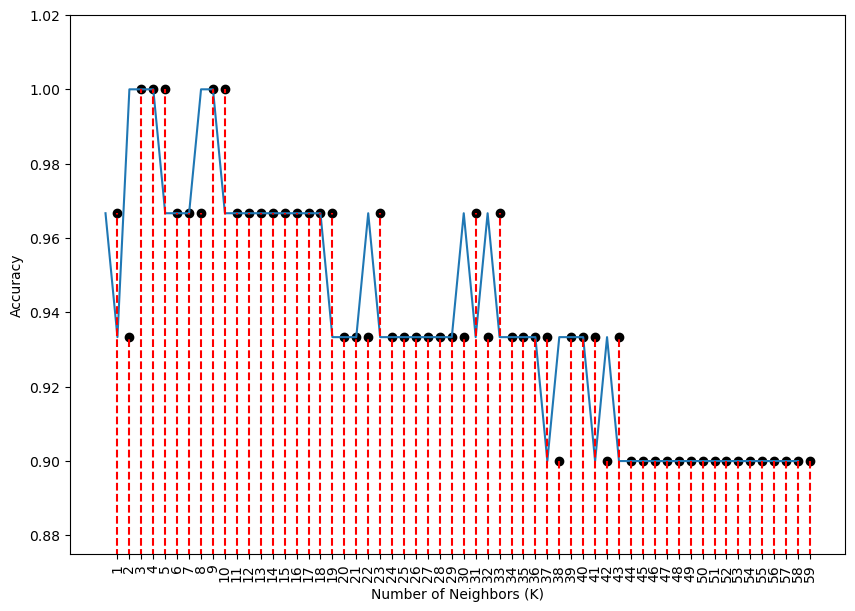

In [119]:
plt.figure(figsize = (10, 7))

plt.plot(df_k_accuracy["accuracy"])
plt.scatter(df_k_accuracy["k"], df_k_accuracy["accuracy"], marker='o', c='black')

# Añadir una línea vertical desde el punto negro hasta el eje x
plt.vlines(x=df_k_accuracy["k"], ymin=0, ymax=df_k_accuracy["accuracy"], color='red', linestyle='--')

plt.ylim(0.875, 1.02)
plt.xticks(df_k_accuracy["k"], rotation = 90)
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")

plt.show()

In [120]:
mejor_indice = np.argmax(df_k_accuracy["accuracy"])
mejor_indice

2

In [127]:
df_k_accuracy.loc[mejor_indice, ["k", "accuracy"]]

# (k, accuracy)

k           3.0
accuracy    1.0
Name: 2, dtype: float64

### **Ejercicio 1:**
- Utiliza el dataset del titanic para practicar (**kNN**)

In [3]:
# Datos

df = pd.read_csv(filepath_or_buffer = "../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

# Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

X_train: (710, 13), y_train: (710,)
X_test: (178, 13), y_test: (178,)


In [4]:
# KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

yhat_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, yhat_knn)

print(accuracy_knn)

0.7921348314606742


### Ejercicio 2:
- Intenta recrear el algormito de **`k-NN`**:

1. Sea **`x`** un patron de prueba a clasificar.
2. Calcular la distancia entre **`x`** y todos los patrones del conjunto de entrenamiento.
3. Se seleccionan los **`k`** patrones cuyas distancias sean menores.
4. Verificar cual es la clase más frecuente entre los **`k`** patrones seleccionados y asignar dicha clase a **`x`**.
5. Repite el algoritmo con otra formula de distancia.

Nota: La **`k`** se selecciona con un valor impar para evitar empates.

In [5]:
def distancia_euclideana(p1, p2):
    return np.sqrt(sum([(x - y)**2 for x, y in zip(p1, p2)]))

In [6]:
# Empezamos con definir los datos

df

,Age,Pclass,Fare,Fare-Binning,Age-Binning,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other,Survived
0,22.0,3.0,7.2500,2.0,1.0,0,1,1,0,0,1,0,0,0.0
1,38.0,1.0,71.2833,2.0,0.0,1,0,0,1,0,0,1,0,1.0
2,26.0,3.0,7.9250,2.0,1.0,1,0,0,1,1,0,0,0,1.0
3,35.0,1.0,53.1000,2.0,0.0,1,0,1,0,0,0,1,0,1.0
4,35.0,3.0,8.0500,2.0,0.0,0,1,1,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,27.0,2.0,13.0000,2.0,0.0,0,1,0,1,0,0,0,1,0.0
884,19.0,1.0,30.0000,2.0,1.0,1,0,1,0,1,0,0,0,1.0
885,28.0,3.0,23.4500,2.0,0.0,1,0,1,0,1,0,0,0,0.0
886,26.0,1.0,30.0000,2.0,1.0,0,1,0,1,0,1,0,0,1.0


In [15]:
# Definimos un nuevo elemento
# Tiene todas las columnas excepto Survived
# Vamos a predecir si sobrevive o no

nueva_instancia = [ 22.0, 3.0, 7.2500, 2.0, 1.0, 1, 0, 1, 0, 1, 0, 0, 0]

print(nueva_instancia)

[22.0, 3.0, 7.25, 2.0, 1.0, 1, 0, 1, 0, 1, 0, 0, 0]


In [16]:
# Vamos a usar todo el df como conjunto de entrenamiento
# Calculamos la distancia entre "nueva_instancia" y cada fila en df

df["distancias"] = [distancia_euclideana(punto, nueva_instancia) for punto in df.drop("Survived", axis = 1).values]

df

,Age,Pclass,Fare,Fare-Binning,Age-Binning,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other,Survived,distancias
0,22.0,3.0,7.2500,2.0,1.0,0,1,1,0,0,1,0,0,0.0,2.000000
1,38.0,1.0,71.2833,2.0,0.0,1,0,0,1,0,0,1,0,1.0,66.070141
2,26.0,3.0,7.9250,2.0,1.0,1,0,0,1,1,0,0,0,1.0,4.296001
3,35.0,1.0,53.1000,2.0,0.0,1,0,1,0,0,0,1,0,1.0,47.730729
4,35.0,3.0,8.0500,2.0,0.0,0,1,1,0,0,1,0,0,0.0,13.215143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,27.0,2.0,13.0000,2.0,0.0,0,1,0,1,0,0,0,1,0.0,8.127884
884,19.0,1.0,30.0000,2.0,1.0,1,0,1,0,1,0,0,0,1.0,23.033942
885,28.0,3.0,23.4500,2.0,0.0,1,0,1,0,1,0,0,0,0.0,17.304335
886,26.0,1.0,30.0000,2.0,1.0,0,1,0,1,0,1,0,0,1.0,23.314427


In [17]:
# Vamos a seleccionar "k" vecinos, en este ejemplo vamos a usar k = 5

k = 5

vecinos = df.sort_values("distancias").head(k)

vecinos

,Age,Pclass,Fare,Fare-Binning,Age-Binning,female,male,Familia,Soltero,Miss.,Mr.,Mrs.,Other,Survived,distancias
648,23.0,3.0,7.550,2.0,1.0,1,0,1,0,1,0,0,0,1.0,1.044031
375,22.0,3.0,7.250,2.0,1.0,1,0,0,1,1,0,0,0,1.0,1.414214
288,22.0,3.0,7.750,2.0,1.0,1,0,0,1,1,0,0,0,1.0,1.500000
141,22.0,3.0,7.750,2.0,1.0,1,0,0,1,1,0,0,0,1.0,1.500000
553,22.0,3.0,7.775,2.0,1.0,1,0,0,1,1,0,0,0,1.0,1.508517


In [18]:
# Verificamos la clase que más se repite (la moda de la columna "Survived")
# Calculamos value_counts() y nos quedamos con el indice en 0, que es el elemento que más se repite
# Transformamos a entero

prediccion = int(vecinos["Survived"].value_counts().index[0])

prediccion

1

In [19]:
# Hacemos una función:

def knn_hecho_a_mano(nueva_instancia, df, k = 5):
    
    df = df.copy()
    
    df["distancias"] = [distancia_euclideana(punto, nueva_instancia) for punto in df.drop("Survived", axis = 1).values]

    vecinos = df.sort_values("distancias").head(k)
    
    prediccion = int(vecinos["Survived"].value_counts().index[0])
    
    return prediccion

knn_hecho_a_mano(nueva_instancia = nueva_instancia, df = df, k = 5)

1

In [ ]:
################################################################################################################################